PREPROCESSING TRAINING DATA

In [1]:
import pandas as pd
import numpy as np

import statistics as stats
data_set = pd.read_csv('air_data.csv')



data_set.fillna(data_set.mean(numeric_only=True), inplace=True)
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Weather Type       20000 non-null  object
 1   Temperature        20000 non-null  int64 
 2   Start_destination  20000 non-null  object
 3   End_destination    20000 non-null  object
 4   Total Distance     20000 non-null  int64 
 5   Ticket Cost        20000 non-null  int64 
 6   Airlines Name      20000 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


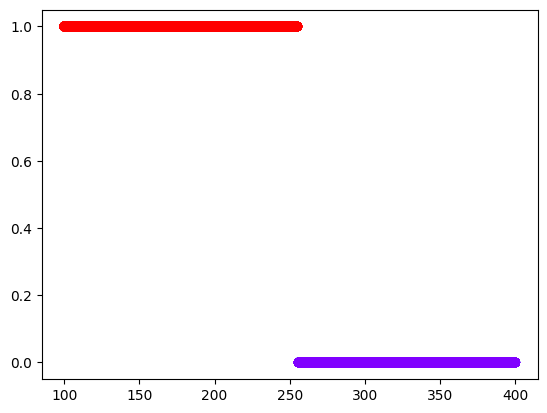

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

data_set = pd.read_csv('air_data.csv')
ticket_cost = data_set['Ticket Cost']
X = ticket_cost.values.reshape(-1, 1)
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=200, random_state=0)
kmeans.fit(X)
plt.scatter(X, kmeans.labels_, c=kmeans.labels_, cmap='rainbow')
plt.show()


SCRATCH SVM

In [1]:
class SVM:
    def __init__(self):
  
        self.x=None
        self.y=None
        self.feature_names=None
        self.target_name=None
        self.w=None
        self.r=None
        self.psi=None 
    def fit(self,X,y): 
  
        if isinstance(X,pd.DataFrame): 
            self.feature_names = [f for f in X.columns]
            self.x=np.array(X)
        else:
            self.x=X
    
        if isinstance(y,pd.DataFrame): 
            self.target_names = [f for f in y.columns]
            self.y=np.array(y).reshape(-1,1)
        else:
            self.y=y
        self.w,self.r,self.psi=self._optimization(self.x,self.y,0.1)
    def _optimization(self,x,y,c):
        xrows=len(x)
        xcols=x.shape[1]
        D=np.diag(y)
        E=np.ones(xrows) 
        W=cp.Variable(xcols) 
        r=cp.Variable(1)
        psi=cp.Variable(xrows)
        obj=cp.Minimize(0.5*cp.norm(W)**2 + c*cp.sum(psi))
        constraints=[cp.matmul(D, x*W-r*E)+psi >=E , psi >= 0]
        opt=cp.Problem(obj, constraints)
        opt.solve()
        W=np.array(W.value)
        r=r.value
        psi=np.array(psi.value)
        return W,r,psi
    def _prediction(self,x):
        x=x.reshape(x.shape[0],1)
        p=(np.matmul(self.w,x) - self.r)
        if p>0:
            return 1
        elif p<0:
            return -1
        
    def predict(self,x):
        ypred=[] 
        x=np.array(x)
        for i in range(0,x.shape[0]):
            ypred.append(self._prediction(x[i,:]))
        return ypred

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import sys

data = pd.read_csv("air_data.csv")
le = LabelEncoder()
data['Weather Type'] = le.fit_transform(data['Weather Type'])
data['Start_destination'] = le.fit_transform(data['Start_destination'])
data['End_destination'] = le.fit_transform(data['End_destination'])
data['Airlines Name'] = le.fit_transform(data['Airlines Name'])
X = data.drop(['Ticket Cost'], axis=1)
y = data['Ticket Cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
sys.stdout=open("predict.csv","w")
y_pred = svm_model.predict(X_test)
for i in y_pred:
    print(i)


